In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Text + multimodal embedding generation and vector search in BigQuery


<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fapplying-llms-to-data%2Fbigquery_embeddings_vector_search.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery Studio logo"><br> Open in BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb">
      <img width="32px" src="https://raw.githubusercontent.com/primer/octicons/refs/heads/main/icons/mark-github-24.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/applying-llms-to-data/bigquery_embeddings_vector_search.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Authors | [Alicia Williams](https://github.com/aliciawilliams), [Jeff Nelson](https://github.com/jeffonelson) |

## Overview


### Objectives

In this tutorial, you'll build a [**semantic search**](https://cloud.google.com/discover/what-is-semantic-search) utility for a fictional e-commerce pet store. You will use [BigQuery](https://cloud.google.com/bigquery/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/docs), to go beyond simple keyword matching by generating [**vector embeddings**](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings) for product text descriptions _and_ for images. This allows customers to find products based on conceptual meaning, not just keywords, creating a more intuitive shopping experience.

By the end, you will know how to:

* **Generate embeddings (numerical representations)** for text and image data.

* **Perform text-to-text vector search** to find products with similar text descriptions

* **Perform text-to-image vector search** to find product images that visually match a text query


All within BigQuery!


### Services and Costs

This tutorial uses the following billable components of Google Cloud:

* **BigQuery**: [Pricing](https://cloud.google.com/bigquery/pricing)

* **BigQuery ML**: [Pricing](https://cloud.google.com/bigquery/pricing#bqml)

* **Vertex AI**: [Pricing](https://cloud.google.com/vertex-ai/generative-ai/pricing)

You can use the [Pricing Calculator](https://cloud.google.com/products/calculator) to generate a cost estimate based on your projected usage.

---

## Before you begin

### Set up your Google Cloud project
**The following steps are required, regardless of your notebook environment.**

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.

2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).

3. [Enable the BigQuery, BigQuery Connection, and Vertex AI APIs](https://console.cloud.google.com/flows/enableapi?apiid=bigquery.googleapis.com,bigqueryconnection.googleapis.com,aiplatform.googleapis.com).

4. If you are running this notebook locally, you need to install the [Cloud SDK](https://cloud.google.com/sdk).

### Set your project ID

In [ ]:
PROJECT_ID = ""  # @param {type:"string"}

# Set the project id
! gcloud config set project {PROJECT_ID}

### Authenticate to your Google Cloud account

Depending on your Jupyter environment, you may have to manually authenticate. Follow the relevant instructions below.

**1. Colab Enterprise or BigQuery Studio Notebooks**
* Do nothing as you are already authenticated.

**2. Colab, uncomment and run:**

In [ ]:
from google.colab import auth

auth.authenticate_user()

**3. Local JupyterLab instance, uncomment and run:**


In [ ]:
# ! gcloud auth login

### Create BigQuery Cloud resource connection

To allow BigQuery to securely interact with other Google Cloud services like Vertex AI (where embedding models are hosted), you need to create a [Cloud resource connection](https://cloud.google.com/bigquery/docs/create-cloud-resource-connection). This code uses the `bq` command-line tool to create a `CLOUD_RESOURCE` connection named `cymbal_conn` in the `US` location.

In [ ]:
!bq mk --connection --location=us \
    --connection_type=CLOUD_RESOURCE cymbal_conn

### Set permissions for Service Account

The resource connection service account requires certain project-level permissions to interact with Vertex AI and Google Cloud Storage.

First, you need to find the email address associated with your new connection's service account.

In [ ]:
SERVICE_ACCT = !bq show --format=prettyjson --connection us.cymbal_conn | grep "serviceAccountId" | cut -d '"' -f 4
SERVICE_ACCT_EMAIL = SERVICE_ACCT[-1]
print(SERVICE_ACCT_EMAIL)

Next you'll assign roles that give their service account permission to be a "BigQuery Connection User," an "AI Platform User" (so it can access Gemini models in Vertex AI), and a "Storage Object Viewer" (so it can access images in Cloud Storage).

*A 60 second pause is added to allow the new IAM permissions to propagate throughout Google Cloud.*

In [ ]:
import time

!gcloud projects add-iam-policy-binding --format=none $PROJECT_ID --member=serviceAccount:$SERVICE_ACCT_EMAIL --role='roles/bigquery.connectionUser'
!gcloud projects add-iam-policy-binding --format=none $PROJECT_ID --member=serviceAccount:$SERVICE_ACCT_EMAIL --role='roles/aiplatform.user'
!gcloud projects add-iam-policy-binding --format=none $PROJECT_ID --member=serviceAccount:$SERVICE_ACCT_EMAIL --role='roles/storage.objectViewer'

time.sleep(60)

### Create helper function to render images from Google Cloud Storage in this notebook

This is a helpful utility function that you'll use later in the tutorial. It takes the results of your search query (stored in a pandas DataFrame) and displays the corresponding product images in a nice grid format, making it easy to see how well your search worked.

#### Import necessary libraries for the helper function

In [ ]:
# Imports for GCS, plotting, and image handling
import io
import math

import matplotlib.pyplot as plt
from PIL import Image
from google.cloud import storage

#### Create a Google Cloud Storage client


In [ ]:
# Set variables
REGION = "US"
bucket = "sample-data-and-media"
# Create Cloud Storage client
client = storage.Client(project=PROJECT_ID)
bucket = client.bucket(bucket)

In [ ]:
def display_product_images(df):
    """Displays product images from a DataFrame in a 3-column grid.
    Simplified for clarity in a tutorial context.
    """
    # Calculate grid size
    num_images = len(df)
    cols = 3
    rows = math.ceil(num_images / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 3.5))

    # Flatten the axes array for easy iteration, regardless of shape
    axs = axs.flatten()

    for i, row in df.iterrows():
        # Extract the image path from the full GCS URI
        image_path = row["uri"].split("/", 3)[-1]

        # Get the image from GCS
        blob = bucket.blob(image_path)
        image = Image.open(io.BytesIO(blob.download_as_bytes()))

        # Plot the image
        axs[i].imshow(image)
        axs[i].set_title(image_path.split("/")[-1], fontsize=10)
        axs[i].axis("off")

    # Hide any unused subplots
    for j in range(num_images, len(axs)):
        axs[j].axis("off")

    plt.tight_layout()
    plt.show()

---


## Load and prepare the sample data

### Create a BigQuery dataset


Before you load data into new tables, you need a place to store them. Running the following query will create a BigQuery dataset called **`cymbal_pets`**.

In [ ]:
%%bigquery --project {PROJECT_ID}

CREATE SCHEMA `cymbal_pets` OPTIONS (location = 'us');

### Create the `products` table

This query uses the `LOAD DATA` command to create a new table called `products` inside your `cymbal_pets` dataset. It simultaneously loads the table with product data from a Parquet file in Google Cloud Storage (GCS).

In [ ]:
%%bigquery --project {PROJECT_ID}

LOAD DATA OVERWRITE cymbal_pets.products
FROM FILES (
  uris = ['gs://sample-data-and-media/cymbal-pets/tables/products'],
  format = 'PARQUET'
);

Run a quick `SELECT` query to view a couple of rows and confirm that your `products` table was created and loaded correctly.

In [ ]:
%%bigquery --project {PROJECT_ID}

SELECT *
FROM cymbal_pets.products
LIMIT 2

Query is running:   0%|          |

Downloading:   0%|          |

,product_id,product_name,brand,category,subcategory,animal_type,search_keywords,price,description,inventory_level,supplier_id,average_rating,uri
0,3,AquaClear 50 Gallon Aquarium,AquaClear,Accessories,None,None,{'list': []},199.99,This stunning aquarium provides a spacious and...,15,103,4.0,gs://sample-data-and-media/cymbal-pets/images/...
1,9,AquaClear 20 Gallon Aquarium,AquaClear,Accessories,None,None,{'list': []},129.99,This spacious glass enclosure provides a comfo...,25,103,2.5,gs://sample-data-and-media/cymbal-pets/images/...


---


## Perform text-to-text semantic search

With the product data prepared, it's time to perform the first [semantic search](https://cloud.google.com/discover/what-is-semantic-search). You want to input a text query, like "kitten toy" and find the most similar products. To do this, you first need to convert the product names and descriptions into [vector embeddings](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings) -- numerical representations that capture their semantic meaning. Once the embeddings are generated, you can run a vector search.


### Create remote model for text embedding

Begin by creating a remote model in BigQuery named `text_embedding_model`. This command doesn't create a new model; instead, it creates a pointer to an existing, pre-trained text embedding model hosted on Vertex AI ([`gemini-embedding-001`](https://ai.google.dev/gemini-api/docs/embeddings#model-versions)). This allows you to leverage Vertex AI models directly from your SQL queries.

In [ ]:
%%bigquery --project {PROJECT_ID}

CREATE OR REPLACE MODEL `cymbal_pets.text_embedding_model`
  REMOTE WITH CONNECTION `us.cymbal_conn`
  OPTIONS (ENDPOINT = 'gemini-embedding-001');

### Generate text embeddings for product descriptions

 To store embeddings, alter the `products` table to add a new column. Since embeddings are numerical representations of text (an array of floating point numbers), the column type will be `ARRAY<FLOAT>`.

In [ ]:
%%bigquery --project {PROJECT_ID}

ALTER TABLE cymbal_pets.products
ADD COLUMN text_embedding ARRAY<FLOAT64>;

Now, generate embeddings with the [`ML.GENERATE_EMBEDDING`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-generate-embedding) function. The following query passes the `product_name` and `description` to the `text_embedding_model` for each item. An `UPDATE` statement saves the resulting embeddings in a new column.

In [ ]:
%%bigquery --project {PROJECT_ID}

UPDATE `cymbal_pets.products` AS t
SET t.text_embedding = s.ml_generate_embedding_result
FROM (
  SELECT
    product_id,
    ml_generate_embedding_result
  FROM
    ML.GENERATE_EMBEDDING(
      MODEL `cymbal_pets.text_embedding_model`,
      (
        SELECT
          product_id,
          CONCAT(product_name, ' ', description) AS content
        FROM `cymbal_pets.products`
      ),
      STRUCT(TRUE AS flatten_json_output)
    )
) AS s
WHERE t.product_id = s.product_id;

You should now see the `text_embedding` column populated with a long array of numbers. Those are vector embeddings that numerically represent each products' name and description!

In [ ]:
%%bigquery --project {PROJECT_ID}

SELECT product_id, product_name, description, text_embedding
FROM cymbal_pets.products
LIMIT 2

Query is running:   0%|          |

Downloading:   0%|          |

,product_id,product_name,description,text_embedding
0,57,AquaClear Aquarium Filter Cartridge,This multi-stage filter provides superior wate...,"[0.011718875728547573, 0.008779315277934074, 0..."
1,171,AquaClear Aquarium Fish Net,This convenient net makes it easy to safely tr...,"[-0.013994182460010052, -0.009928294457495213,..."


### Use `VECTOR SEARCH` to perform a text-to-text search

Now, use [`VECTOR_SEARCH`](https://cloud.google.com/bigquery/docs/reference/standard-sql/search_functions#vector_search) to perform a text-to-text search. This function works in two main steps:
* A subquery generates an embedding for a search query (e.g. "kitten toy")
* `VECTOR_SEARCH` then compares this new embedding against all existing product embeddings and returns the `top_k` (3 in this case) most similar results

In [ ]:
%%bigquery text_matches --project {PROJECT_ID}

SELECT base.product_id, base.product_name, base.brand, base.category, base.description, base.average_rating, base.uri, distance
    FROM
      VECTOR_SEARCH(
        TABLE `cymbal_pets.products`,
        'text_embedding',
        (
        -- GENERATE AN EMBEDDING AS A SUBQUERY
        SELECT
          ml_generate_embedding_result,
          content AS query
        FROM
          ML.GENERATE_EMBEDDING(
            MODEL `cymbal_pets.text_embedding_model`,
            ( SELECT "kitten toy" AS content)
          )
        ),
        top_k => 3)
ORDER BY distance ASC;

The results of the vector search are now stored in a pandas DataFrame called `text_matches` (a parameter added to the [`%%bigquery` magic](https://cloud.google.com/python/docs/reference/bigquery/latest/magics) utility in the prior cell).

Let's display the top rows.

In [ ]:
text_matches.head()

,product_id,product_name,brand,category,description,average_rating,uri,distance
0,27,Purrfect Perch Cat Toy,Purrfect Perch,Toys,This cat tree provides multiple levels for cli...,4.0,gs://sample-data-and-media/cymbal-pets/images/...,0.784780
1,33,Cozy Naps Catnip Toy,Cozy Naps,Toys,"This soft, plush cushion provides a cozy and c...",4.7,gs://sample-data-and-media/cymbal-pets/images/...,0.791354
2,157,Cozy Naps Catnip Toy Ball,Cozy Naps,Toys,This yarn is perfect for creating cozy and com...,4.8,gs://sample-data-and-media/cymbal-pets/images/...,0.797839


### View search results
Now you can use the helper function to display the images of the top 3 products the vector search returned. As you can see, the results are semantically related to "kitten toy" even if the exact words don't appear in the product names or descriptions.

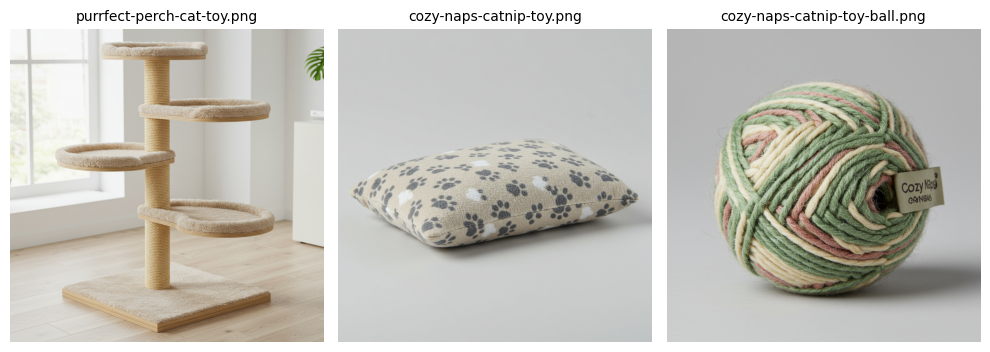

In [ ]:
display_product_images(text_matches)

---


## Perform text-to-image (multimodal) semantic search

The previous example performed a text-to-text search. Now we can look at multimodal search. This allows you to use a text query to find products based on their visual characteristics (not using any written descriptions). Note that multimodal search also extends to audio, video, and more.

### Create remote model for multimodal embedding

To work with images, you'll need a different embedding model. You'll now create a remote model pointing to [`multimodalembedding@001`](https://cloud.google.com/vertex-ai/generative-ai/docs/embeddings/get-multimodal-embeddings#supported-models). Unlike the previous text-only model, this one is **multimodal**, meaning it can generate a single vector embedding from content that's text, an image, a video, audio, or more.

In [ ]:
%%bigquery --project {PROJECT_ID}

CREATE OR REPLACE MODEL `cymbal_pets.mm_embedding_model`
  REMOTE WITH CONNECTION `us.cymbal_conn`
  OPTIONS (ENDPOINT = 'multimodalembedding@001');

### Generate multimodal embeddings for product images

You need a new column in your table to store the embeddings generated from the product images.

In [ ]:
%%bigquery --project {PROJECT_ID}

ALTER TABLE cymbal_pets.products
ADD COLUMN mm_embedding ARRAY<FLOAT64>;

This step generates embeddings directly from product images. The process again uses [`ML.GENERATE_EMBEDDING`](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-generate-embedding), but with the `mm_embedding_model`.

The key difference is how you provide the image to the model. Instead of a text string, the model requires a temporary, secure URL for each image. Because we haven't stored [`ObjectRef`](https://cloud.google.com/bigquery/docs/reference/standard-sql/objectref_functions)s in our table, we can generate them on the fly by chaining three functions together:

* [`OBJ.MAKE_REF`](https://cloud.google.com/bigquery/docs/reference/standard-sql/objectref_functions#objmake_ref): First, it converts the GCS path from the `uri` column into a structured `ObjectRef`
* [`OBJ.FETCH_METADATA`](https://cloud.google.com/bigquery/docs/reference/standard-sql/objectref_functions#objfetch_metadata): Next, it populates the `ObjectRef` with file metadata from Cloud Storage
* [`OBJ.GET_ACCESS_URL`](https://cloud.google.com/bigquery/docs/reference/standard-sql/objectref_functions#objget_access_url): Finally, it generates a signed URL from the metadata-rich `ObjectRef` that the model can access.

The resulting vector embedding for each image is then saved to the `mm_embedding` column with an `UPDATE` statement.

In [ ]:
%%bigquery --project {PROJECT_ID}

UPDATE `cymbal_pets.products` AS t
SET
  t.mm_embedding = s.ml_generate_embedding_result
FROM (
  SELECT
    product_id,
    ml_generate_embedding_result
  FROM
    ML.GENERATE_EMBEDDING(
      MODEL `cymbal_pets.mm_embedding_model`,
      (
        SELECT
          product_id,
          OBJ.GET_ACCESS_URL(OBJ.FETCH_METADATA(OBJ.MAKE_REF(uri, 'us.cymbal_conn')), 'r') AS content
        FROM
          `cymbal_pets.products`
      ),
      STRUCT(TRUE AS flatten_json_output)
    )
) AS s
WHERE t.product_id = s.product_id;

 Inspect the table one more time to see your new `mm_embedding` column filled with multimodal embeddings, derived from product images.

In [ ]:
%%bigquery --project {PROJECT_ID}

SELECT product_id, product_name, description, mm_embedding
FROM cymbal_pets.products
LIMIT 2

Query is running:   0%|          |

Downloading:   0%|          |

,product_id,product_name,description,mm_embedding
0,3,AquaClear 50 Gallon Aquarium,This stunning aquarium provides a spacious and...,"[0.0190890729, 0.0193080865, -0.00221736147, -..."
1,9,AquaClear 20 Gallon Aquarium,This spacious glass enclosure provides a comfo...,"[0.0341621898, 0.0419731215, -0.0227391645, 0...."


###Use `VECTOR SEARCH` to perform a text-to-image search

The power of a multimodal model is that it places both text and images into the same "embedding space." This allows you to use an embedding generated from a text string (like "kitten toy") and directly compare it against embeddings generated from images.

The process for this text-to-image search mirrors the previous text-to-text search, with two key differences:
* A text query ("kitten toy") is embedded using the multimodal `mm_embedding_model`
* The search is performed against the image embedding column (`embedding_mm_image`) to find the most visually similar items

In [ ]:
%%bigquery multimodal_matches --project {PROJECT_ID}

SELECT base.product_id, base.product_name, base.brand, base.category, base.description, base.average_rating, base.uri, distance
    FROM
      VECTOR_SEARCH(
        TABLE`cymbal_pets.products`,
        'mm_embedding',
        (
        SELECT
          ml_generate_embedding_result,
          content AS query
        FROM
          ML.GENERATE_EMBEDDING(
            MODEL `cymbal_pets.mm_embedding_model`,
            (SELECT "kitten toy" AS content)
          )
        ),
        'ml_generate_embedding_result',
        top_k => 3)
ORDER BY distance ASC;

### View search results

Finally, let's visualize the results of the text-to-image search. You should see images of products that are conceptually related to "kitten toy," demonstrating the power of multimodal embeddings to find relevant items based on visual similarity to a text description.

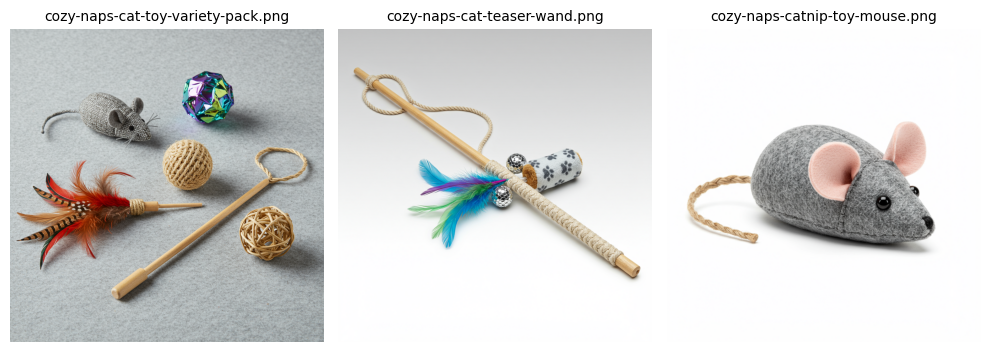

In [ ]:
# Display the results
display_product_images(multimodal_matches)

---

## Cleaning Up

To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.

Otherwise, you can delete the individual resources you created in this tutorial:

In [ ]:
# Delete the BigQuery table
! bq rm --table -f cymbal_pets.products

# Delete the remote models
! bq rm --model -f cymbal_pets.text_embedding_model
! bq rm --model -f cymbal_pets.mm_embedding_model

# Delete the remote connection
! bq rm --connection --project_id=$PROJECT_ID --location=us cymbal_conn

# Delete the BigQuery dataset
! bq rm -r -f $PROJECT_ID:cymbal_pets